In [1]:
import sys
import os
os.chdir('../')
sys.path.append('.')

In [2]:
# Load and preview dataset
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.autoencoder import EncoderDecoder
import tensorflow as tf


def generate_sinwave(n_samples=1000, frequency=30):
    start_time = 0
    end_time = 1
    sample_rate = n_samples
    time = np.arange(start_time, end_time, 1/sample_rate)
    theta = 0
    frequency = frequency
    amplitude = 1
    sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)
    return sinewave



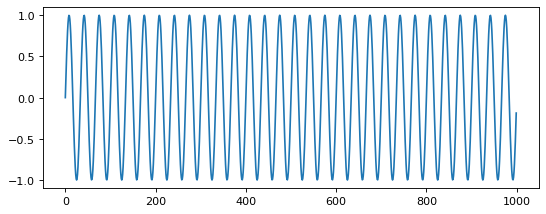

In [3]:
x = generate_sinwave()
plt.figure(figsize=(8, 3), dpi=80)
plt.plot(x)

In [5]:
def temporalize(x, timesteps):
    out = []
    for i in range(len(x)-timesteps-1):
        t = []
        for j in range(1,timesteps+1):
            # Gather past records upto the lookback period
            t.append(x[[(i+j+1)], :])
        out.append(t)
    return np.array(out)



In [57]:
timesteps = 20
features = 1

x_temp = temporalize(x[:,np.newaxis], timesteps=timesteps)
x_temp.shape

(979, 20, 1, 1)

In [7]:
from tensorflow import keras

inputs = keras.layers.Input(shape=(timesteps,features))
ed = EncoderDecoder(features=features, timesteps=timesteps, lstm_units=[32,16,8], name='auto_encoder')
outputs = ed(inputs)
auto_encoder = keras.Model(inputs=inputs, outputs=outputs)


In [8]:
auto_encoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 auto_encoder (EncoderDecode  (None, 20, 1)            16737     
 r)                                                              
                                                                 
Total params: 16,737
Trainable params: 16,737
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit model
auto_encoder.fit(x_temp, x_temp, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 11s 32ms/step - loss: 0.4895 - mae: 0.6290
Epoch 2/10
31/31 [==============================] - 1s 36ms/step - loss: 0.3144 - mae: 0.4711
Epoch 3/10
31/31 [==============================] - 1s 43ms/step - loss: 0.1551 - mae: 0.2994
Epoch 4/10
31/31 [==============================] - 1s 37ms/step - loss: 0.0957 - mae: 0.2128
Epoch 5/10
31/31 [==============================] - 1s 40ms/step - loss: 0.0718 - mae: 0.1788
Epoch 6/10
31/31 [==============================] - 1s 37ms/step - loss: 0.0665 - mae: 0.1738
Epoch 7/10
31/31 [==============================] - 2s 61ms/step - loss: 0.0531 - mae: 0.1473
Epoch 8/10
31/31 [==============================] - 2s 53ms/step - loss: 0.0444 - mae: 0.1296
Epoch 9/10
31/31 [==============================] - 2s 56ms/step - loss: 0.0371 - mae: 0.1147
Epoch 10/10
31/31 [==============================] - 2s 59ms/step - loss: 0.0310 - mae: 0.1012


In [10]:
# demonstrate reconstruction
# yhat = auto_encoder.predict(x_temp[0][np.newaxis,...], verbose=0)
yhat = auto_encoder.predict(x_temp[:10], verbose=0)

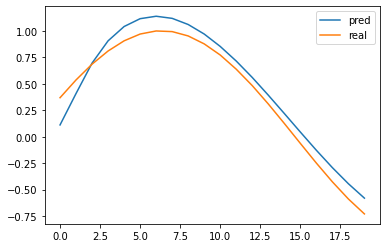

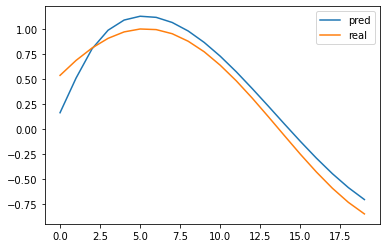

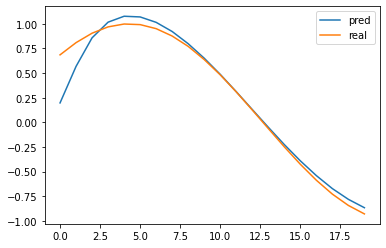

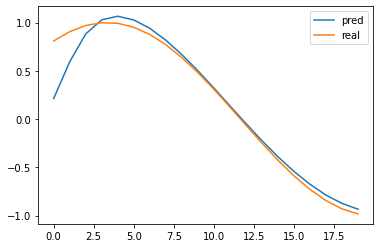

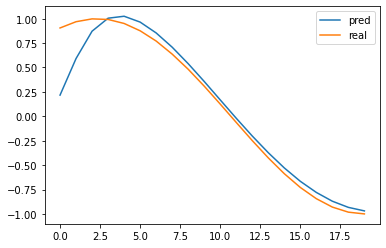

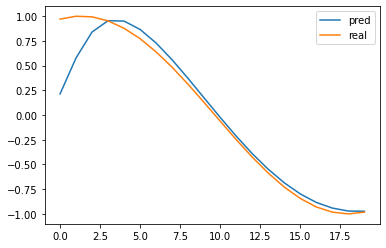

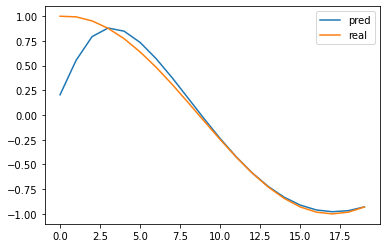

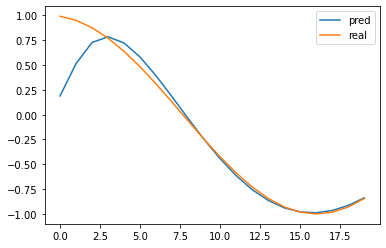

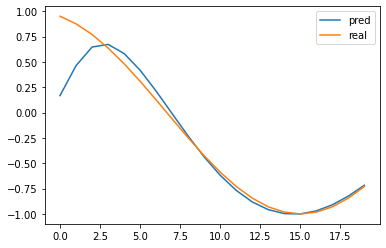

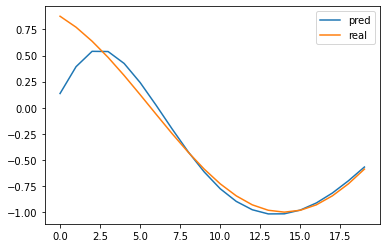

In [11]:
for i in range(yhat.shape[0]):
    plt.figure()
    plt.plot(np.round(yhat[i],3), label='pred')
    plt.plot(np.round(x_temp[i,:,0], 3), label='real')
    plt.legend()

In [15]:
x_auto = auto_encoder.get_layer("auto_encoder").encoder(x_temp[:1])

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[5.85191   , 1.2975069 , 1.6520114 , 0.30908433, 4.3815217 ,
        0.6695049 , 0.0234492 , 0.03288411]], dtype=float32)>